In [215]:
# Imports 
import numpy as np
# import random
from datetime import datetime
import matplotlib.pyplot as plt

In [216]:
# Parameters
n_cities = 20
n_population = 10
mutation_rate = 0.1

In [217]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [87, 87],
 'London': [13, 79],
 'Moscow': [24, 11],
 'Barcelona': [46, 36],
 'Rome': [13, 39],
 'Paris': [4, 89],
 'Vienna': [34, 1],
 'Munich': [78, 41],
 'Istanbul': [61, 8],
 'Kyiv': [6, 78],
 'Bucharest': [2, 52],
 'Minsk': [1, 84],
 'Warsaw': [16, 78],
 'Budapest': [83, 50],
 'Milan': [64, 33],
 'Prague': [80, 68],
 'Sofia': [9, 41],
 'Birmingham': [94, 1],
 'Brussels': [38, 46],
 'Amsterdam': [77, 57]}

In [218]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Brussels', 'Istanbul', 'Amsterdam', ..., 'Minsk', 'Rome',
        'Paris'],
       ['Rome', 'Barcelona', 'Bucharest', ..., 'Istanbul', 'Berlin',
        'Moscow'],
       ['Istanbul', 'Berlin', 'Minsk', ..., 'Brussels', 'Amsterdam',
        'Prague'],
       ...,
       ['Moscow', 'Rome', 'Brussels', ..., 'Birmingham', 'Vienna',
        'Istanbul'],
       ['Vienna', 'Brussels', 'Moscow', ..., 'Amsterdam', 'Rome',
        'Paris'],
       ['Birmingham', 'Berlin', 'Rome', ..., 'Moscow', 'Istanbul',
        'Minsk']], dtype='<U10')

In [219]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [220]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([1074.91857644, 1157.6956591 ,  926.75877413, 1082.31413396,
       1038.81464841, 1174.37614847,  993.50172084, 1118.61368635,
       1127.42240216, 1245.6759347 , 1152.88923013, 1030.27735409,
       1087.11657019, 1134.45722244,  913.59679968,  973.56839099,
       1034.40131364, 1141.43867662, 1014.53929481, 1166.71340749,
       1201.5389153 ,  966.56509557, 1121.57664208,  951.79337444,
        974.33724665, 1155.53521653, 1116.56243774, 1138.89545725,
        898.31854647, 1026.71129808,  848.10423161,  934.04124749,
       1240.09958704, 1271.62713815,  998.37015529,  865.81877082,
        956.3930437 , 1042.3488473 , 1140.79442686, 1024.25756436,
       1078.31472618, 1170.05280259, 1119.38235792, 1221.6118012 ,
       1107.28797875, 1120.07287439,  917.41482573, 1322.99665771,
       1150.91933224, 1060.64456855, 1007.31713017, 1000.68388029,
       1148.10326307, 1004.22314229, 1176.3727006 , 1041.4685736 ,
       1026.99558274, 1116.16191155, 1057.8416613 ,  930.51165

In [221]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Amsterdam', 'Paris', 'Rome', 'Istanbul', 'Budapest', 'Birmingham',
       'Sofia', 'Prague', 'London', 'Barcelona', 'Berlin', 'Moscow',
       'Brussels', 'Milan', 'Warsaw', 'Munich', 'Vienna', 'Kyiv', 'Minsk',
       'Bucharest'], dtype='<U10')

In [222]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Rome', 'Moscow', 'Birmingham', 'Vienna', 'Berlin', 'Prague',
       'Amsterdam', 'London', 'Paris', 'Bucharest', 'Istanbul', 'Kyiv',
       'Minsk', 'Sofia', 'Brussels', 'Munich', 'Barcelona', 'Budapest',
       'Warsaw', 'Milan'], dtype='<U10')

In [223]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Amsterdam', 'Vienna', 'Prague', 'London', 'Milan', 'Bucharest',
       'Budapest', 'Birmingham', 'Paris', 'Barcelona', 'Berlin', 'Kyiv',
       'Rome', 'Moscow', 'Brussels', 'Sofia', 'Munich', 'Warsaw',
       'Istanbul', 'Minsk'], dtype='<U10')

In [224]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%50==0: print(i, best_solution[1], fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 inf 1066.8492893685718 04/10/23 15:52
50 702.9714834840734 1085.8089433295481 04/10/23 15:52
100 702.9714834840734 1063.9735032300466 04/10/23 15:52
150 655.6667011032501 1080.3345394790572 04/10/23 15:52
200 655.6667011032501 1065.765318312207 04/10/23 15:52
250 655.6667011032501 1051.574540617529 04/10/23 15:52
300 651.9850372957285 1065.296288712836 04/10/23 15:52
350 638.9303638556747 1074.4903751920465 04/10/23 15:52
400 638.9303638556747 1056.8003332848368 04/10/23 15:52
450 638.9303638556747 1073.2971974920606 04/10/23 15:52
500 638.9303638556747 1046.2265067042372 04/10/23 15:52
550 638.9303638556747 1071.9483217472016 04/10/23 15:52
600 638.9303638556747 1057.590187167006 04/10/23 15:52
650 638.9303638556747 1053.4557110672815 04/10/23 15:52
700 638.9303638556747 1073.543669879728 04/10/23 15:52
750 638.9303638556747 1053.6165884251839 04/10/23 15:52
800 638.9303638556747 1074.9636267076046 04/10/23 15:52
850 638.9303638556747 1052.9895241274323 04/10/23 15:52
900 638.930363

In [225]:
best_solution

[8963,
 539.6613296450128,
 array([['Berlin', 'Budapest', 'Amsterdam', 'Munich', 'Birmingham',
         'Istanbul', 'Milan', 'Brussels', 'Barcelona', 'Rome', 'Paris',
         'Warsaw', 'London', 'Kyiv', 'Minsk', 'Bucharest', 'Sofia',
         'Prague', 'Moscow', 'Vienna']], dtype='<U10')]

In [226]:
print(n_population)
print(mutation_rate)

100
0.9


ValueError: x and y must be the same size

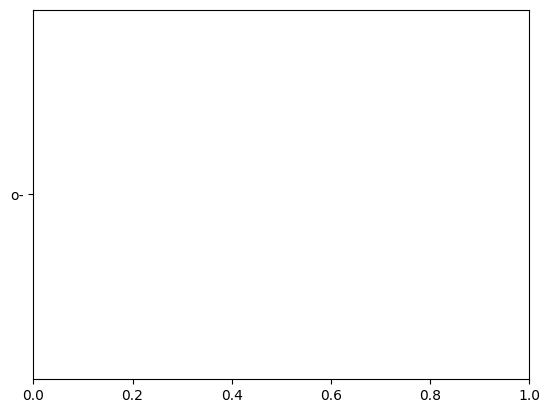

In [227]:
plt.scatter(best_solution,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()